In [1]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Importar df downtime limpio
TablaMaestraDowntime = pd.read_csv("/content/TablaMaestraDowntime.csv")

In [3]:
TablaMaestraDowntime

,Unnamed: 0,EventID,ScheduleID,AssetName,DownStart,DownEnd,Reason,Category,DownStart_dia,DownStart_mes,DownStart_año,Total_Duration,Fault_Number,Category_Number,ShiftNumber,OEE,Total_Time,Production_Goal,Planned_Rate,DayOfWeek
0,0,1052248,25579,Bench 100D,2022-01-06,2022-01-06,Falla 49: Lifter MarkerPosn. Superior,Position Sensor Faults,6,1,2022,12,49,3,1,1.0,600,157,15.7,3
1,1,1052250,25579,Bench 100D,2022-01-06,2022-01-06,Falla 58: C-Clip Posn. Extendida,Position Sensor Faults,6,1,2022,2,58,3,1,1.0,600,157,15.7,3
2,2,1052253,25579,Bench 100D,2022-01-06,2022-01-06,Falla189. Paremtro Close lenght Tolerancia Act...,Position Sensor Faults,6,1,2022,1,189,3,1,1.0,600,157,15.7,3
3,3,1052265,25579,Bench 100D,2022-01-06,2022-01-06,Falla 49: Lifter MarkerPosn. Superior,Position Sensor Faults,6,1,2022,1,49,3,1,1.0,600,157,15.7,3
4,4,1052274,25579,Bench 100D,2022-01-06,2022-01-06,Falla 102: Disponible,Other Faults,6,1,2022,8,102,9,1,1.0,600,157,15.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50950,50950,1717115,59167,Bench 100D,2024-05-07,2024-05-07,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,7,5,2024,1,35,0,2,1.0,336,0,20.0,1
50951,50951,1717120,59167,Bench 100D,2024-05-07,2024-05-07,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,7,5,2024,1,35,0,2,1.0,336,0,20.0,1
50952,50952,1717121,59167,Bench 100D,2024-05-07,2024-05-07,Falla 12. Scanner de Seguridad Interrumpido Du...,Scanner Faults,7,5,2024,2,12,6,2,1.0,336,0,20.0,1
50953,50953,1717122,59167,Bench 100D,2024-05-07,2024-05-07,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,7,5,2024,1,35,0,2,1.0,336,0,20.0,1


In [4]:
# Estadisticas descriptivas para cada columna
for col in TablaMaestraDowntime.loc[:,]:
    print(col)
    print(TablaMaestraDowntime[col].describe())
    print(" ")

Unnamed: 0
count    50955.00000
mean     25477.00000
std      14709.58582
min          0.00000
25%      12738.50000
50%      25477.00000
75%      38215.50000
max      50954.00000
Name: Unnamed: 0, dtype: float64
 
EventID
count    5.095500e+04
mean     1.372853e+06
std      2.058372e+05
min      1.052248e+06
25%      1.183858e+06
50%      1.356694e+06
75%      1.559740e+06
max      1.717226e+06
Name: EventID, dtype: float64
 
ScheduleID
count    50955.000000
mean     43212.630380
std      10834.231962
min      15530.000000
25%      34377.000000
50%      39848.000000
75%      52871.000000
max      59182.000000
Name: ScheduleID, dtype: float64
 
AssetName
count          50955
unique             1
top       Bench 100D
freq           50955
Name: AssetName, dtype: object
 
DownStart
count          50955
unique           581
top       2024-05-03
freq             364
Name: DownStart, dtype: object
 
DownEnd
count          50955
unique           580
top       2024-05-03
freq             364
Na

In [5]:
# Contar la frecuencia de cada valor en la columna 'DayOfWeek'
frequency_counts = TablaMaestraDowntime['DayOfWeek'].value_counts()

# Mostrar la frecuencia de cada valor
print("Frecuencia de cada valor en la columna 'DayOfWeek':")
print(frequency_counts)

Frecuencia de cada valor en la columna 'DayOfWeek':
DayOfWeek
1    11064
2    10829
3    10816
0     9347
4     7832
5      975
6       92
Name: count, dtype: int64


In [6]:
# Eliminacion de columnas con variables tipo string / object

columnas_a_eliminar = TablaMaestraDowntime.select_dtypes(include=["object"]).columns
TablaMaestraDowntime.drop(columnas_a_eliminar, axis=1, inplace=True)


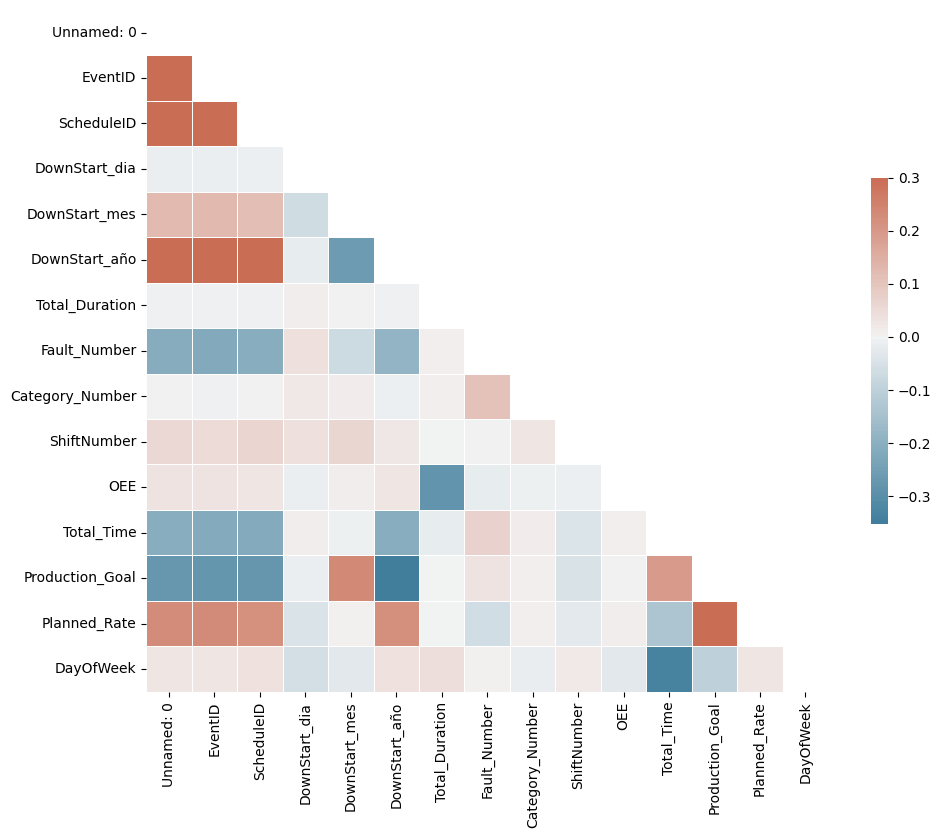

In [7]:
# Generar la correlacion de variables dentro del df TablaMaestraDowntime y mostrarlos en una matriz de correlacion

# Calcular matriz de correlacion
correlation_matrix = TablaMaestraDowntime.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# Generacion de mapa de calor
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [8]:
# Eliminar las columnas EventID, ScheduleID, DownStart, DownEnd del dataframe ya que no tienen correlacion positiva

TablaMaestraDowntime.drop(columns=['EventID', 'ScheduleID'], axis=1, inplace=True)


In [9]:
# Eliminar la columna 'Unnamed' del data frame ya que mete ruido

TablaMaestraDowntime.drop(columns=['Unnamed: 0'], axis=1, inplace=True)


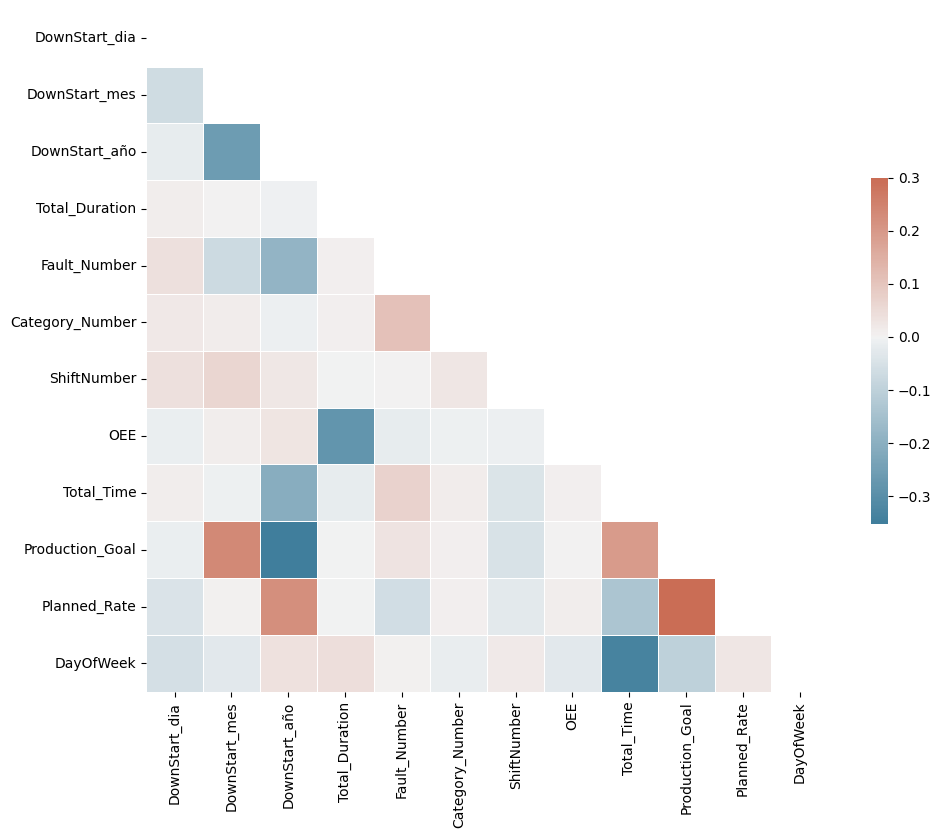

In [10]:
# Generacion la correlacion de variables dentro del df TablaMaestraDowntime

# Calcular matriz de correlacion
correlation_matrix = TablaMaestraDowntime.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

# Generacion de mapa de calor
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

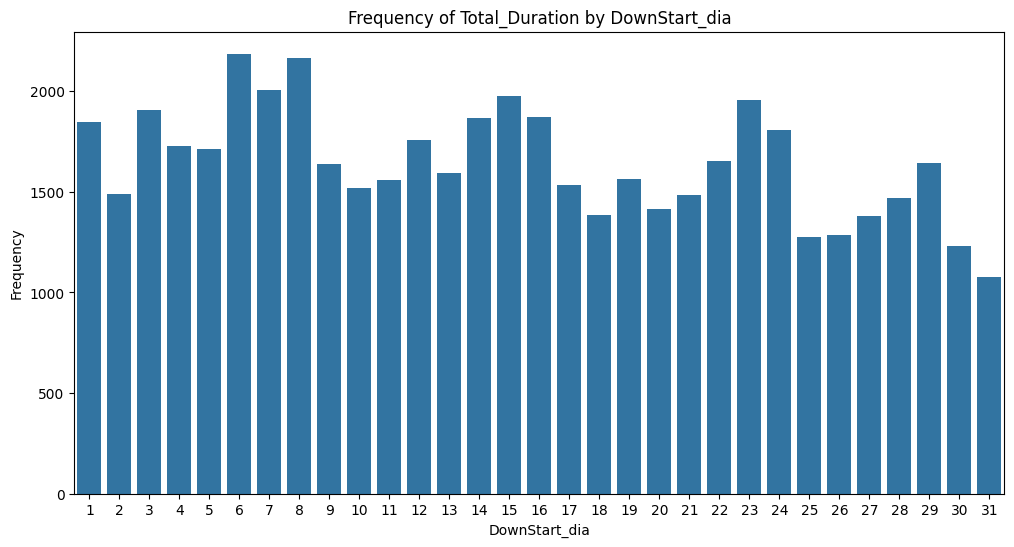

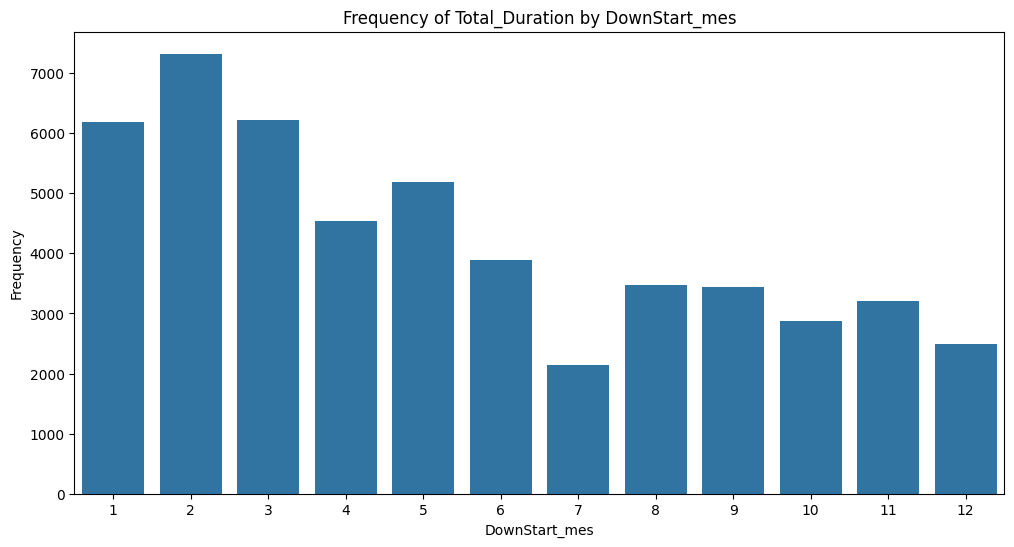

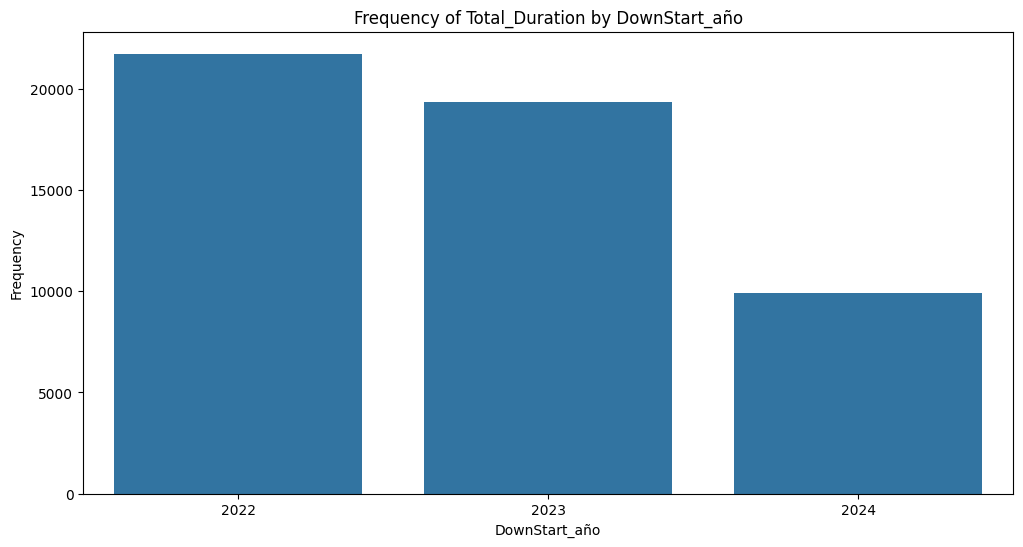

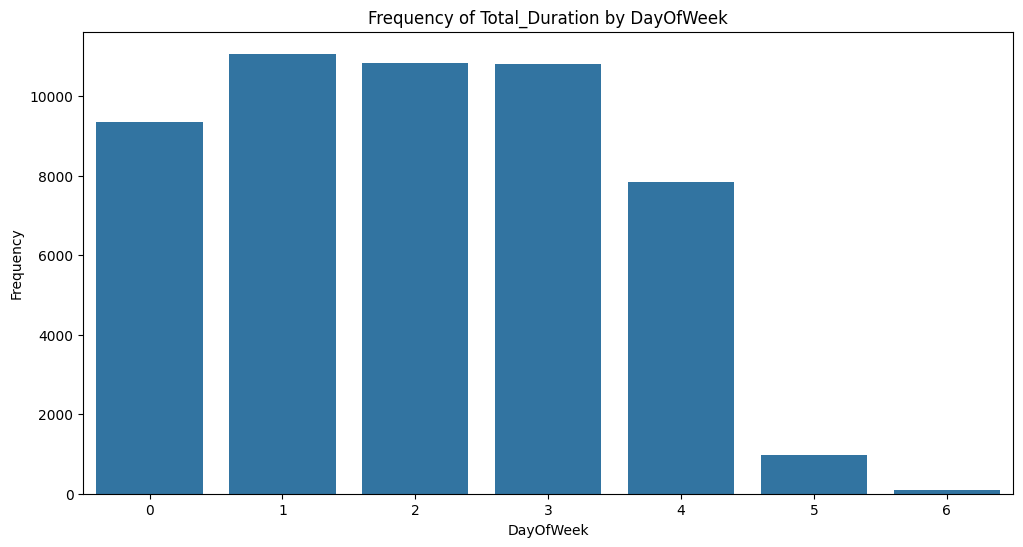

In [11]:
# Evaluar la frecuencia de eventos de Total_Duration por DownStart_dia, DownStart_mes, DownStart_año, DayOfWeek

# Frecuencia de Total_Duration por DownStart_dia
frequency_counts = TablaMaestraDowntime.groupby('DownStart_dia')['Total_Duration'].count()

# Imprimir en grafico
plt.figure(figsize=(12, 6))
sns.barplot(x=frequency_counts.index, y=frequency_counts.values)
plt.title('Frequency of Total_Duration by DownStart_dia')
plt.xlabel('DownStart_dia')
plt.ylabel('Frequency')
plt.show()

# Frecuencia de Total_Duration por DownStart_mes
frequency_counts = TablaMaestraDowntime.groupby('DownStart_mes')['Total_Duration'].count()

# Imprimir en grafico
plt.figure(figsize=(12, 6))
sns.barplot(x=frequency_counts.index, y=frequency_counts.values)
plt.title('Frequency of Total_Duration by DownStart_mes')
plt.xlabel('DownStart_mes')
plt.ylabel('Frequency')
plt.show()

# Frecuencia de Total_Duration por DownStart_año
frequency_counts = TablaMaestraDowntime.groupby('DownStart_año')['Total_Duration'].count()

# Imprimir en grafico
plt.figure(figsize=(12, 6))
sns.barplot(x=frequency_counts.index, y=frequency_counts.values)
plt.title('Frequency of Total_Duration by DownStart_año')
plt.xlabel('DownStart_año')
plt.ylabel('Frequency')
plt.show()

# Frecuencia de Total_Duration por DayOfWeek
frequency_counts = TablaMaestraDowntime.groupby('DayOfWeek')['Total_Duration'].count()

# Imprimir en grafico
plt.figure(figsize=(12, 6))
sns.barplot(x=frequency_counts.index, y=frequency_counts.values)
plt.title('Frequency of Total_Duration by DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Frequency')
plt.show()


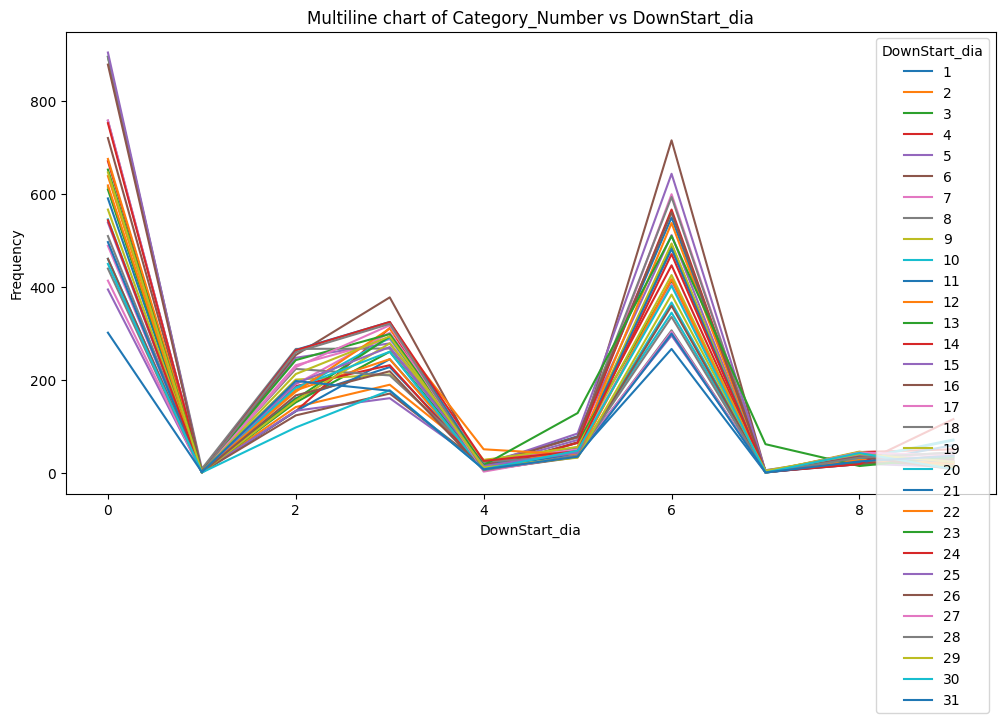

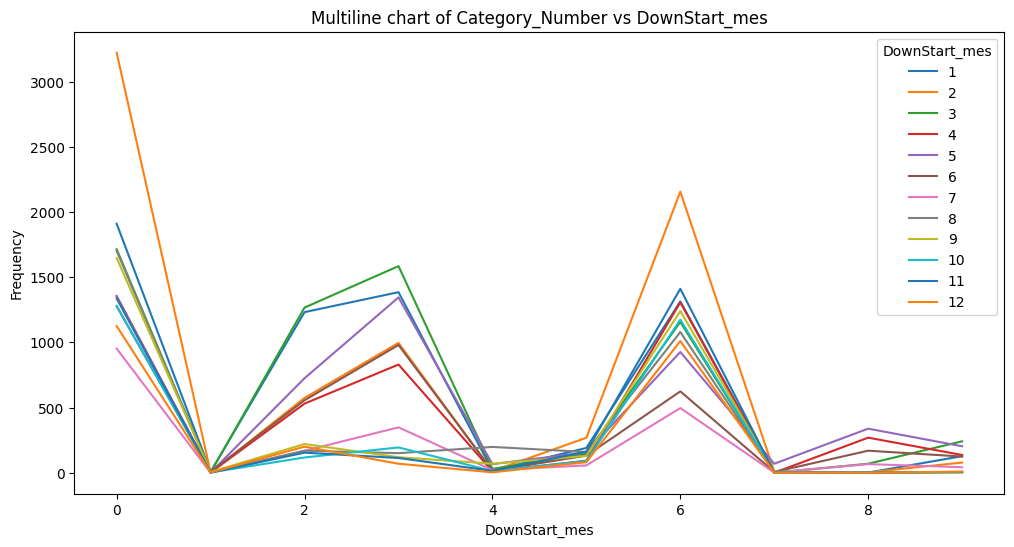

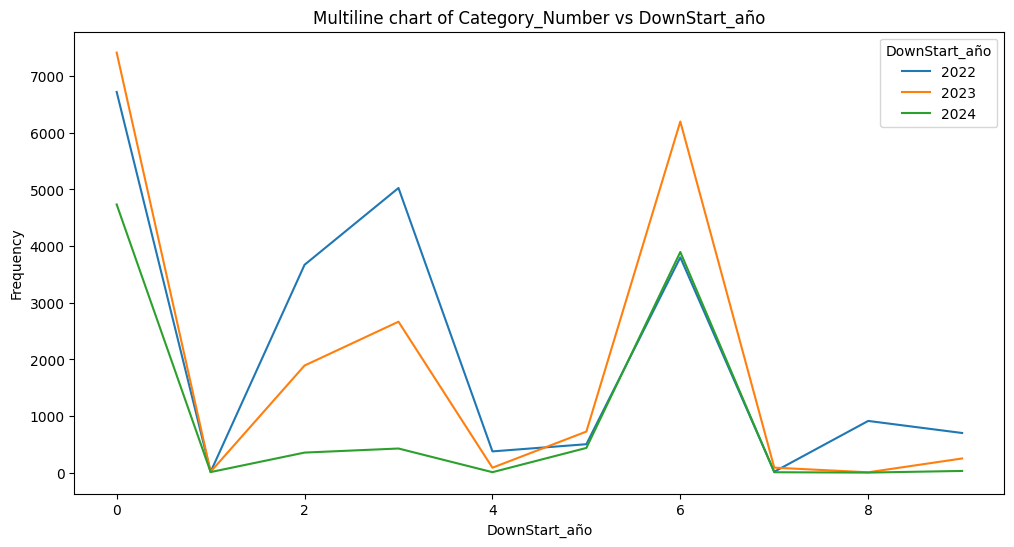

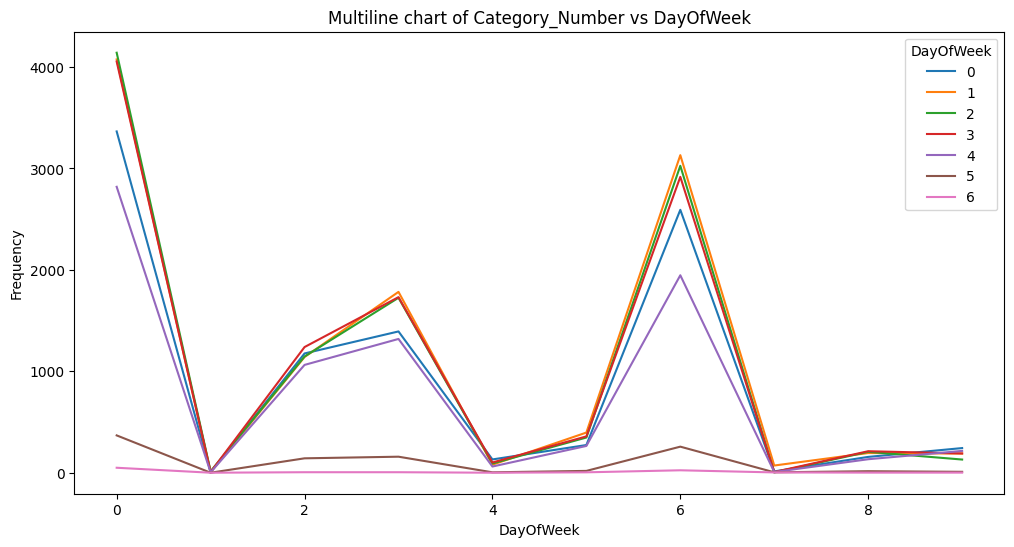

In [12]:
# Relacion de DownStart_dia, DownStart_mes, DownStart_año, DayOfWeek contra la variable Category_Number

# Drop columns with string/object data types
columnas_a_eliminar = TablaMaestraDowntime.select_dtypes(include=["object"]).columns
TablaMaestraDowntime.drop(columnas_a_eliminar, axis=1, inplace=True)

# Create a new DataFrame for the analysis
df_analysis = TablaMaestraDowntime[['DownStart_dia', 'DownStart_mes', 'DownStart_año', 'DayOfWeek', 'Category_Number']]

# Calculate the correlation between each variable and Category_Number
correlation_dia = df_analysis['DownStart_dia'].corr(df_analysis['Category_Number'])
correlation_mes = df_analysis['DownStart_mes'].corr(df_analysis['Category_Number'])
correlation_año = df_analysis['DownStart_año'].corr(df_analysis['Category_Number'])
correlation_dia_semana = df_analysis['DayOfWeek'].corr(df_analysis['Category_Number'])

# Create a new DataFrame for the multilines plot
df_multilines = df_analysis.groupby(['Category_Number', 'DownStart_dia']).size().unstack().fillna(0)

# Plot the multilines chart
df_multilines.plot(kind='line', figsize=(12, 6))
plt.title('Multiline chart of Category_Number vs DownStart_dia')
plt.xlabel('DownStart_dia')
plt.ylabel('Frequency')
plt.show()

# Create a new DataFrame for the multilines plot
df_multilines = df_analysis.groupby(['Category_Number', 'DownStart_mes']).size().unstack().fillna(0)

# Plot the multilines chart
df_multilines.plot(kind='line', figsize=(12, 6))
plt.title('Multiline chart of Category_Number vs DownStart_mes')
plt.xlabel('DownStart_mes')
plt.ylabel('Frequency')
plt.show()

# Create a new DataFrame for the multilines plot
df_multilines = df_analysis.groupby(['Category_Number', 'DownStart_año']).size().unstack().fillna(0)

# Plot the multilines chart
df_multilines.plot(kind='line', figsize=(12, 6))
plt.title('Multiline chart of Category_Number vs DownStart_año')
plt.xlabel('DownStart_año')
plt.ylabel('Frequency')
plt.show()

# Create a new DataFrame for the multilines plot
df_multilines = df_analysis.groupby(['Category_Number', 'DayOfWeek']).size().unstack().fillna(0)

# Plot the multilines chart
df_multilines.plot(kind='line', figsize=(12, 6))
plt.title('Multiline chart of Category_Number vs DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Frequency')
plt.show()


Correlation between Total_Duration and ShiftNumber: -0.0011157896953416584


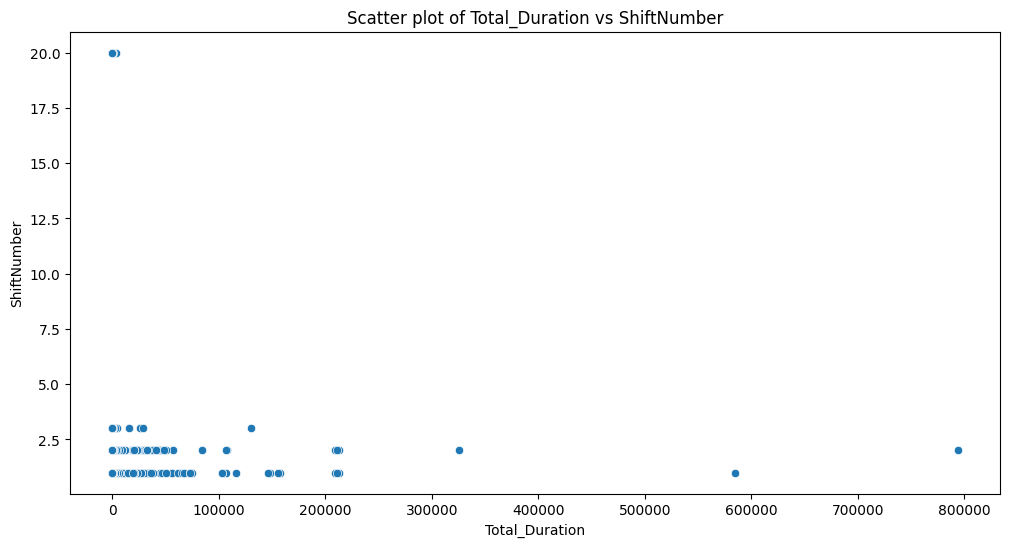

Correlation between Total_Time and ShiftNumber: -0.041992861864380844


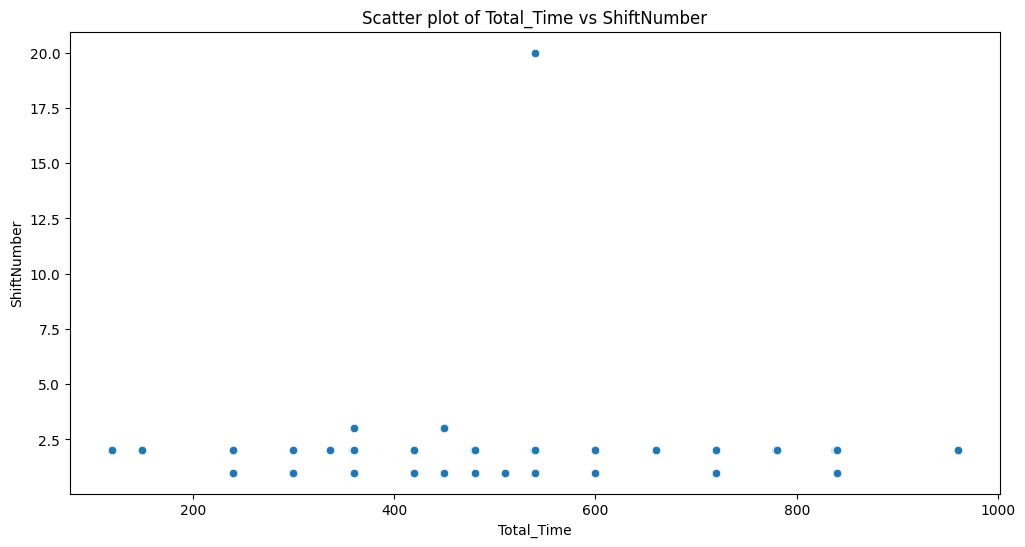

In [13]:
# Relacion Total_Duration y  Total_Time contra la variable ShiftNumber y representacion grafica

import matplotlib.pyplot as plt
# Calculate the correlation between Total_Duration and ShiftNumber
correlation_duration_shift = TablaMaestraDowntime['Total_Duration'].corr(TablaMaestraDowntime['ShiftNumber'])

# Print the correlation coefficient
print("Correlation between Total_Duration and ShiftNumber:", correlation_duration_shift)

# Plot the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=TablaMaestraDowntime['Total_Duration'], y=TablaMaestraDowntime['ShiftNumber'])
plt.title('Scatter plot of Total_Duration vs ShiftNumber')
plt.xlabel('Total_Duration')
plt.ylabel('ShiftNumber')
plt.show()

# Calculate the correlation between Total_Time and ShiftNumber
correlation_time_shift = TablaMaestraDowntime['Total_Time'].corr(TablaMaestraDowntime['ShiftNumber'])

# Print the correlation coefficient
print("Correlation between Total_Time and ShiftNumber:", correlation_time_shift)

# Plot the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=TablaMaestraDowntime['Total_Time'], y=TablaMaestraDowntime['ShiftNumber'])
plt.title('Scatter plot of Total_Time vs ShiftNumber')
plt.xlabel('Total_Time')
plt.ylabel('ShiftNumber')
plt.show()


In [14]:
# Eliminacion columnas con valores superiores a 3 en variable "ShiftNumber"

# Select rows where ShiftNumber is greater than 3
filtered_df = TablaMaestraDowntime[TablaMaestraDowntime['ShiftNumber'] > 3]

# Drop the selected rows
TablaMaestraDowntime.drop(filtered_df.index, inplace=True)

# Print the updated DataFrame
print(TablaMaestraDowntime)


       DownStart_dia  DownStart_mes  DownStart_año  Total_Duration  \
0                  6              1           2022              12   
1                  6              1           2022               2   
2                  6              1           2022               1   
3                  6              1           2022               1   
4                  6              1           2022               8   
...              ...            ...            ...             ...   
50950              7              5           2024               1   
50951              7              5           2024               1   
50952              7              5           2024               2   
50953              7              5           2024               1   
50954              7              5           2024               1   

       Fault_Number  Category_Number  ShiftNumber  OEE  Total_Time  \
0                49                3            1  1.0         600   
1                58

Correlation between Total_Duration and ShiftNumber: -0.0012905486342465117


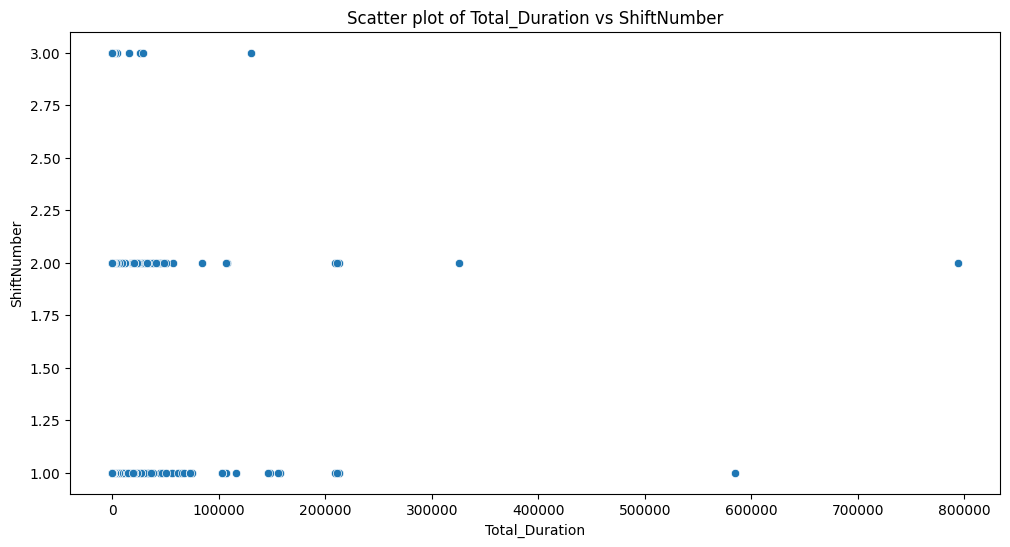

Correlation between Total_Time and ShiftNumber: -0.047750540674966986


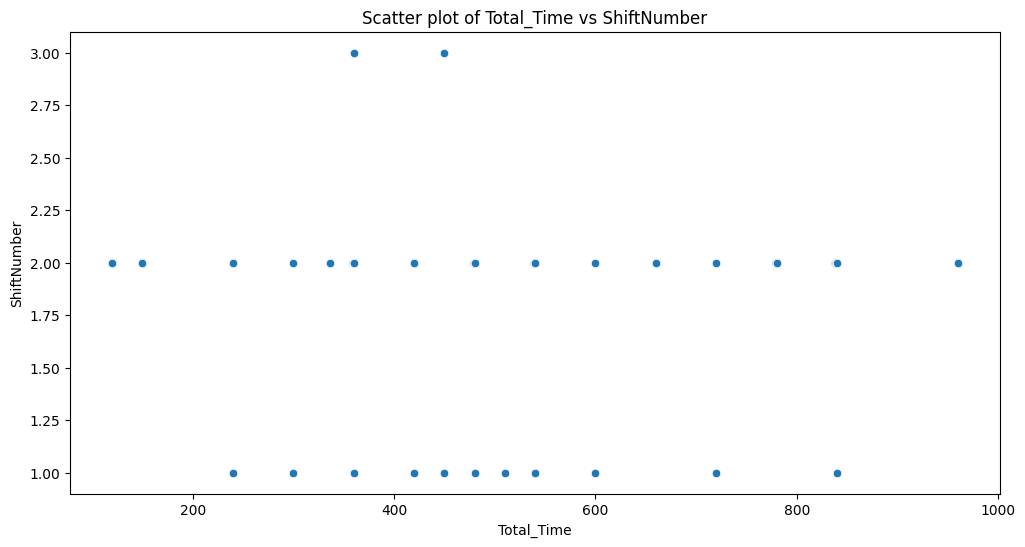

In [15]:
# Relacion Total_Duration y  Total_Time contra la variable ShiftNumber y representacion grafica

import matplotlib.pyplot as plt
# Calculate the correlation between Total_Duration and ShiftNumber
correlation_duration_shift = TablaMaestraDowntime['Total_Duration'].corr(TablaMaestraDowntime['ShiftNumber'])

# Print the correlation coefficient
print("Correlation between Total_Duration and ShiftNumber:", correlation_duration_shift)

# Plot the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=TablaMaestraDowntime['Total_Duration'], y=TablaMaestraDowntime['ShiftNumber'])
plt.title('Scatter plot of Total_Duration vs ShiftNumber')
plt.xlabel('Total_Duration')
plt.ylabel('ShiftNumber')
plt.show()

# Calculate the correlation between Total_Time and ShiftNumber
correlation_time_shift = TablaMaestraDowntime['Total_Time'].corr(TablaMaestraDowntime['ShiftNumber'])

# Print the correlation coefficient
print("Correlation between Total_Time and ShiftNumber:", correlation_time_shift)

# Plot the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=TablaMaestraDowntime['Total_Time'], y=TablaMaestraDowntime['ShiftNumber'])
plt.title('Scatter plot of Total_Time vs ShiftNumber')
plt.xlabel('Total_Time')
plt.ylabel('ShiftNumber')
plt.show()


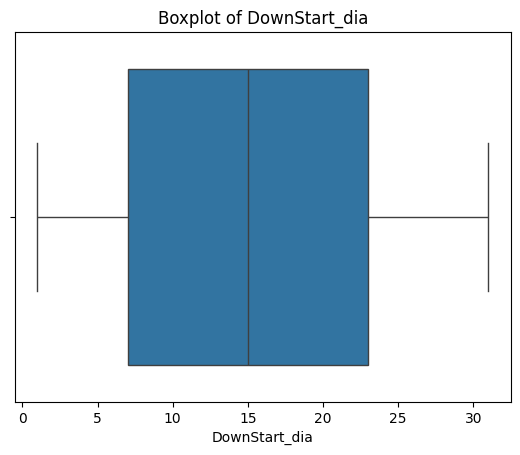

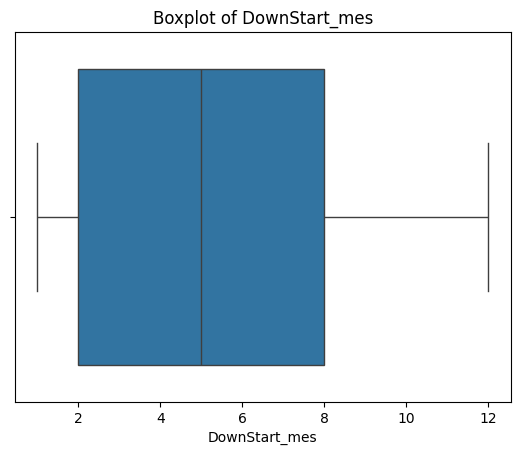

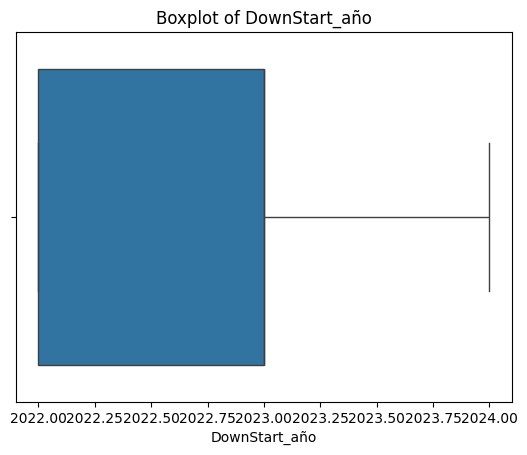

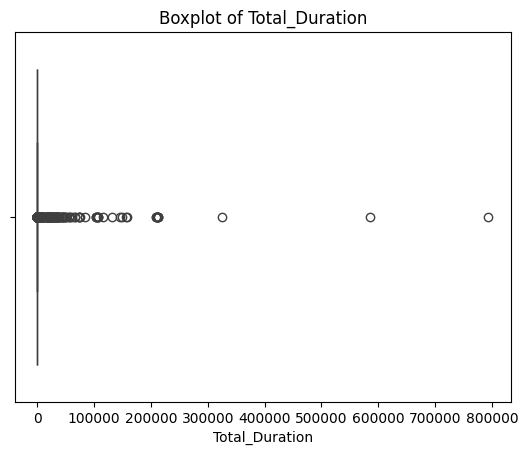

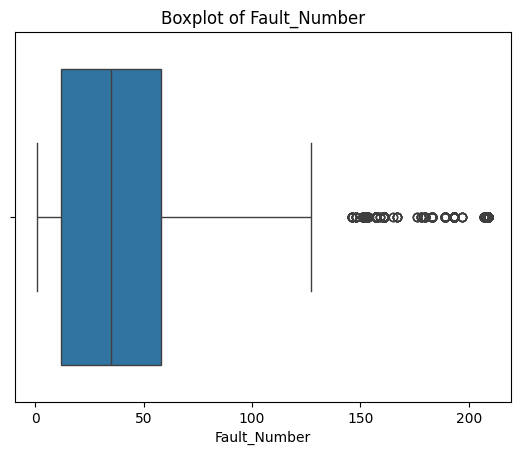

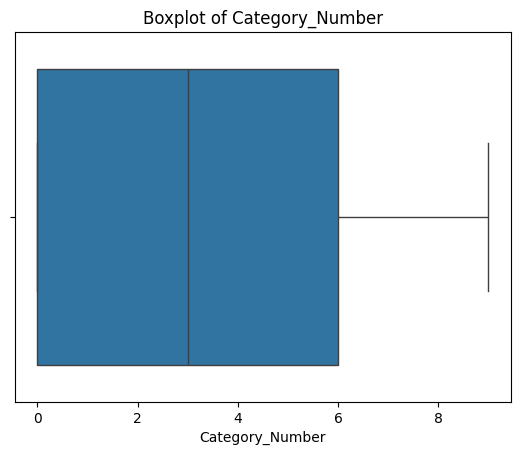

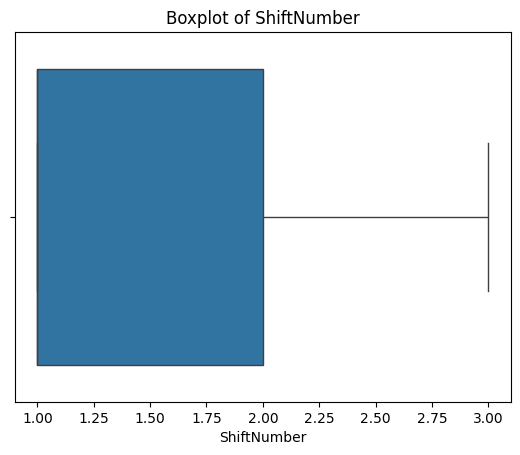

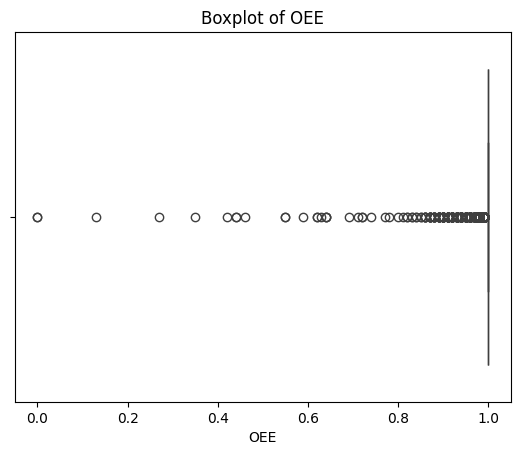

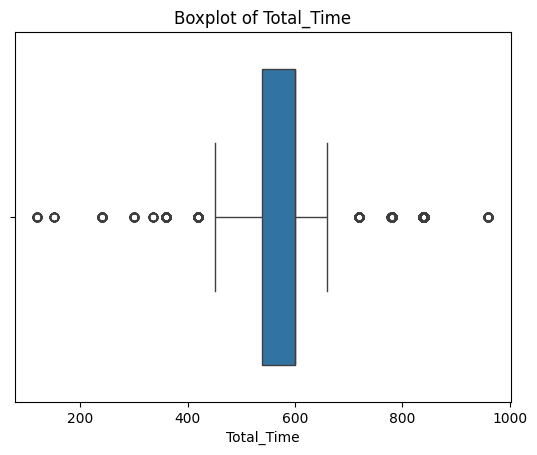

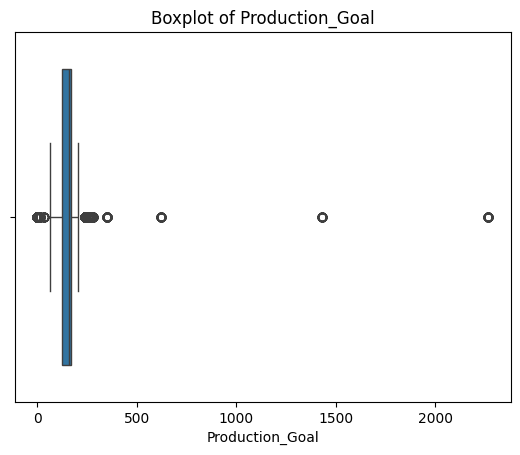

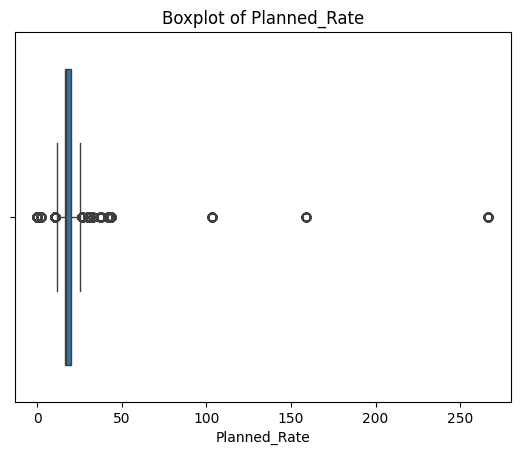

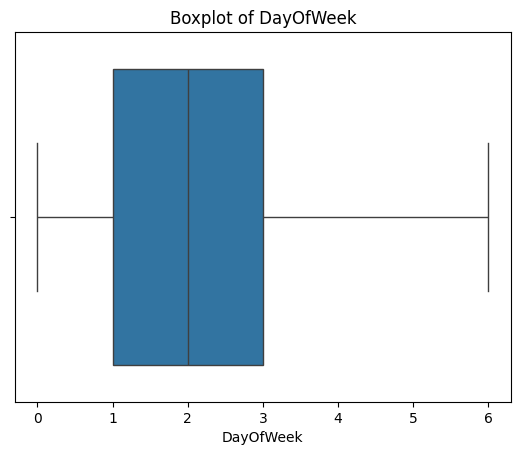

In [16]:
# Visualizacion de outliers

# Create a boxplot for each numerical column in the DataFrame
for col in TablaMaestraDowntime.select_dtypes(include=['int64', 'float64']):
    sns.boxplot(x=TablaMaestraDowntime[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [17]:
TablaMaestraDowntime

,DownStart_dia,DownStart_mes,DownStart_año,Total_Duration,Fault_Number,Category_Number,ShiftNumber,OEE,Total_Time,Production_Goal,Planned_Rate,DayOfWeek
0,6,1,2022,12,49,3,1,1.0,600,157,15.7,3
1,6,1,2022,2,58,3,1,1.0,600,157,15.7,3
2,6,1,2022,1,189,3,1,1.0,600,157,15.7,3
3,6,1,2022,1,49,3,1,1.0,600,157,15.7,3
4,6,1,2022,8,102,9,1,1.0,600,157,15.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
50950,7,5,2024,1,35,0,2,1.0,336,0,20.0,1
50951,7,5,2024,1,35,0,2,1.0,336,0,20.0,1
50952,7,5,2024,2,12,6,2,1.0,336,0,20.0,1
50953,7,5,2024,1,35,0,2,1.0,336,0,20.0,1


In [18]:
# Definir las características y los transformadores
categorical_features = ['Category_Number', 'ShiftNumber']
numeric_features = ['Total_Duration','Total_Time', 'Production_Goal', 'Planned_Rate',"DownStart_dia","DownStart_mes","DayOfWeek"]

In [19]:
# Transformador para escalar las características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [20]:
# Transformador para codificar características categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [21]:
# Combinar los transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [22]:
# Aplicar los transformadores
processed_data = preprocessor.fit_transform(TablaMaestraDowntime)

In [23]:
#Convertir el resultado a un DataFrame de pandas
processed_df = pd.DataFrame(processed_data)

In [24]:
# Obtener nombres de características one-hot
onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Obtener todos los nombres de las características
feature_names = numeric_features + list(onehot_feature_names)

# Convertir la matriz procesada a un DataFrame con los nombres de las características
processed_df = pd.DataFrame(processed_data, columns=feature_names)

In [25]:
processed_df

,Total_Duration,Total_Time,Production_Goal,Planned_Rate,DownStart_dia,DownStart_mes,DayOfWeek,Category_Number_0,Category_Number_1,Category_Number_2,Category_Number_3,Category_Number_4,Category_Number_5,Category_Number_6,Category_Number_7,Category_Number_8,Category_Number_9,ShiftNumber_1,ShiftNumber_2,ShiftNumber_3
0,-0.031372,0.193276,0.188799,-0.201188,-1.041879,-1.283524,0.711105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.033052,0.193276,0.188799,-0.201188,-1.041879,-1.283524,0.711105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.033220,0.193276,0.188799,-0.201188,-1.041879,-1.283524,0.711105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.033220,0.193276,0.188799,-0.201188,-1.041879,-1.283524,0.711105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.032044,0.193276,0.188799,-0.201188,-1.041879,-1.283524,0.711105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,-0.033220,-2.221190,-1.193682,0.192257,-0.927725,-0.112809,-0.710407,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50915,-0.033220,-2.221190,-1.193682,0.192257,-0.927725,-0.112809,-0.710407,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50916,-0.033052,-2.221190,-1.193682,0.192257,-0.927725,-0.112809,-0.710407,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
50917,-0.033220,-2.221190,-1.193682,0.192257,-0.927725,-0.112809,-0.710407,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
#Aplicar PCA
pca = PCA(n_components=10)  # Especifica el número de componentes principales deseados
pca_result = pca.fit_transform(processed_df)

In [27]:
# Obtener la varianza explicada por cada componente principal
variance_explained = pca.explained_variance_ratio_

# Imprimir los componentes principales y la varianza explicada
for i, variance in enumerate(variance_explained):
    print(f"Componente principal {i+1}: {variance:.2f}")

Componente principal 1: 0.21
Componente principal 2: 0.17
Componente principal 3: 0.13
Componente principal 4: 0.12
Componente principal 5: 0.11
Componente principal 6: 0.08
Componente principal 7: 0.06
Componente principal 8: 0.04
Componente principal 9: 0.03
Componente principal 10: 0.02


In [28]:
# Obtener la varianza explicada acumulada
cumulative_variance_explained = np.cumsum(variance_explained)

# Imprimir la varianza explicada acumuladas
for i, variance in enumerate(cumulative_variance_explained):
    print(f"Varianza acumulada hasta el componente principal {i+1}: {variance:.2f}")

Varianza acumulada hasta el componente principal 1: 0.21
Varianza acumulada hasta el componente principal 2: 0.38
Varianza acumulada hasta el componente principal 3: 0.51
Varianza acumulada hasta el componente principal 4: 0.63
Varianza acumulada hasta el componente principal 5: 0.75
Varianza acumulada hasta el componente principal 6: 0.83
Varianza acumulada hasta el componente principal 7: 0.89
Varianza acumulada hasta el componente principal 8: 0.93
Varianza acumulada hasta el componente principal 9: 0.95
Varianza acumulada hasta el componente principal 10: 0.97


In [29]:
# Crear un DataFrame para almacenar los resultados
pca_weights_df = pd.DataFrame(pca.components_, columns=processed_df.columns)

# Imprimir los resultados
print("PCA y sus pesos por variable:")
pca_weights_df

PCA y sus pesos por variable:


,Total_Duration,Total_Time,Production_Goal,Planned_Rate,DownStart_dia,DownStart_mes,DayOfWeek,Category_Number_0,Category_Number_1,Category_Number_2,Category_Number_3,Category_Number_4,Category_Number_5,Category_Number_6,Category_Number_7,Category_Number_8,Category_Number_9,ShiftNumber_1,ShiftNumber_2,ShiftNumber_3
0,-0.014474,0.117698,0.710106,0.640448,-0.060277,0.226263,-0.127027,0.004496,-3.811028e-07,-0.007913,-0.007146,0.000522,-0.000793,0.012097,-0.000136,-0.001579,0.000452,0.011893,-0.000789,-0.011105
1,0.092928,-0.686099,-0.021489,0.270357,-0.145007,-0.013128,0.648134,0.029122,-8.380025e-05,-0.012897,-0.028935,-0.001508,0.002494,0.020146,-0.000233,-0.005437,-0.002668,0.025123,-0.048276,0.023153
2,0.113446,-0.031700,0.063905,0.242663,0.659089,-0.690383,-0.012373,-0.050083,-1.988851e-04,0.037158,0.055636,-0.002799,-0.001631,-0.049107,0.000733,0.001749,0.008542,0.035537,-0.035063,-0.000474
3,0.965003,0.071277,0.023034,-0.083724,0.094370,0.215154,0.000374,-0.001919,-8.759367e-06,-0.003148,-0.006213,0.002278,0.003888,0.003941,0.000617,0.001700,-0.001135,-0.018910,0.022153,-0.003243
4,0.204286,0.207109,-0.013265,0.121781,-0.721020,-0.608727,-0.035623,-0.016749,1.670122e-04,0.017411,0.041225,-0.002271,-0.001140,-0.041085,-0.000897,0.001098,0.002242,0.052352,-0.043251,-0.009101
5,0.072434,-0.602182,-0.162047,0.135109,-0.086135,-0.007498,-0.746230,0.057538,-1.577235e-04,-0.036812,-0.075024,0.000134,0.004125,0.064594,0.000989,-0.010218,-0.005168,0.046785,-0.075267,0.028482
6,0.001881,-0.092584,0.006406,0.040586,-0.039626,-0.076939,-0.040067,-0.105595,-8.934918e-05,0.013969,0.061384,-0.003857,-0.002344,0.023448,0.001538,0.007041,0.004505,-0.698438,0.690658,0.007780
7,0.001435,0.014605,-0.009654,0.018494,0.016568,-0.009248,-0.001781,0.777156,-2.363827e-04,-0.054396,-0.084793,-0.003741,-0.012297,-0.611288,-0.000433,-0.004563,-0.005408,-0.075001,0.073137,0.001864
8,0.006507,0.279805,-0.471125,0.453389,0.052494,0.053460,0.058028,0.251704,-1.043842e-04,-0.206761,-0.423810,-0.009714,-0.013745,0.437442,-0.002220,-0.015351,-0.017441,-0.068460,0.023469,0.044991
9,0.000840,0.065158,-0.250789,0.231363,0.010572,0.106372,-0.009793,-0.042580,1.651414e-04,-0.564004,0.731044,-0.001624,0.010469,-0.099638,-0.001052,-0.015784,-0.016996,0.006515,-0.040841,0.034327


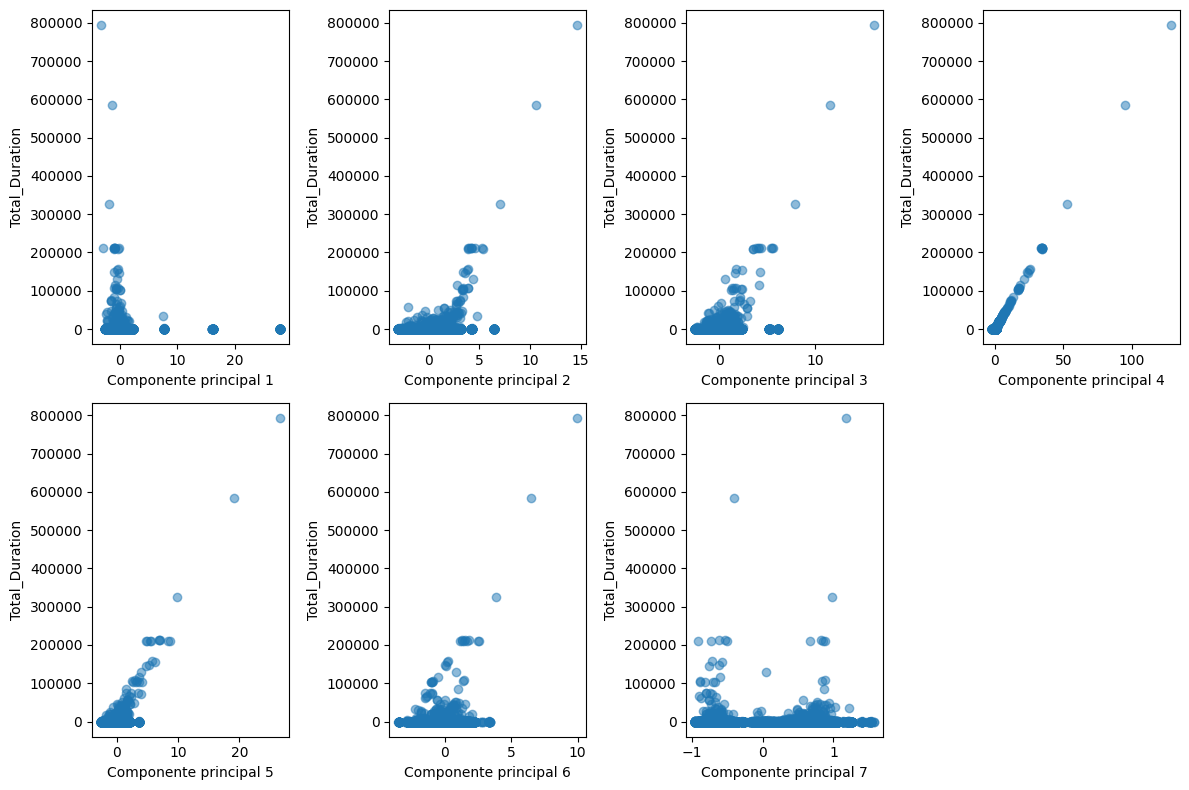

In [30]:
n_selected_components = 7  # Define el número de componentes principales que deseas seleccionar
selected_components = pca_result[:, :n_selected_components]
# Crear un gráfico de dispersión para cada componente principal vs Total_Duration
num_components = selected_components.shape[1]

plt.figure(figsize=(12, 8))
for i in range(num_components):
    plt.subplot(2, (num_components + 1) // 2, i+1)  # Se ajusta el número de columnas
    plt.scatter(selected_components[:, i], TablaMaestraDowntime['Total_Duration'], alpha=0.5)
    plt.xlabel(f'Componente principal {i+1}')
    plt.ylabel('Total_Duration')

plt.tight_layout()
plt.show()